## Deskripsi Project

Data yang dibutuhkan tersimpan dalam tiga file:
- gold_recovery_train.csv 
- gold_recovery_test.csv 
- gold_recovery_full.csv 

Data ini diindeks sesuai dengan tanggal dan waktu perolehannya (fitur date). Terkait waktu, parameter yang letaknya bersebelahan umumnya bersifat mirip.

Sebagian parameter tidak tersedia karena pengukuran dan/atau penghitungannya dilakukan jauh setelahnya. Itulah sebabnya, beberapa fitur yang ada di training set mungkin tidak ada di test set. Test set-nya pun juga tidak memuat target.
Dataset sumber memuat training dan test set dengan semua fitur-fiturnya.
Ingat, data yang kamu miliki adalah data mentah yang baru saja diunduh dari gudang data. Sebelum membuat model, periksa ketepatan datamu. Untuk itu, ikuti instruksi kami.

## Tujuan 

Adapun analisis ini bertujuan untuk membuat sebuah prototipe model machine learning untuk Zyfra. Tujuan lainnya adalah mencari nilai sMAPE akhir.

## Descripsi Data

Berikut merupakan cara untuk memberikan nama pada fitur-fitur yang ada:

[stage].[parameter_type].[parameter_name]

Contoh: rougher.input.feed_ag

Nilai yang memungkinkan untuk [stage]:
- rougher — flotasi
- primary_cleaner — pemurnian pertama
- secondary_cleaner — pemurnian kedua
- final — karakteristik akhir

Nilai yang memungkinkan untuk [parameter_type]:
- input — parameter bahan mentah
- output — parameter produk
- state — parameter yang menunjukkan karakteristik tahapan saat ini
- calculation — perhitungan karakteristik



## Tahapan

- Tahap 1. Siapkan Data
- Tahap 2. Analisis Data
- Tahap 3. Buat Model

In [1]:
# Muat Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Tahap 1. Siapkan Data 

### Buka file dan pelajari datanya.

File path:

- /datasets/gold_recovery_train.csv
- /datasets/gold_recovery_test.csv
- /datasets/gold_recovery_full.csv

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [4]:
df_test.head(2)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [5]:
df_full.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [6]:
print('df_train shape:\n',df_train.shape)
print('df_test shape:\n',df_test.shape)
print('df_full shape:\n',df_full.shape)

df_train shape:
 (16860, 87)
df_test shape:
 (5856, 53)
df_full shape:
 (22716, 87)


In [7]:
print(f'\nMissing value df_train:\n{df_train.isna().sum()}')
print(f'\nMissing value df_test:\n{df_test.isna().sum()}')
print(f'\nMissing value df_full:\n{df_full.isna().sum()}')


Missing value df_train:
date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

Missing value df_test:
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floa

In [8]:
print('Duplicated of df_train:', df_train.duplicated().sum())
print('Duplicated of df_test :', df_test.duplicated().sum())
print('Duplicated of df_full :', df_full.duplicated().sum())

Duplicated of df_train: 0
Duplicated of df_test : 0
Duplicated of df_full : 0


**Catatan**

1. Ukuran dataset: 
    - df_train : (16860, 87)
    - df_test  : (5856, 53)
    - df_full  : (22716, 87)
2. Dari ketiga dataset tidak terdapat duplikasi didalamnya.
3. Terdapat missing value di 3 dataset tersebut

### Periksa perolehan emas

Periksa apakah perolehan emas telah dihitung dengan benar. Menggunakan training set, hitung perolehan untuk fitur rougher.output.recovery. Temukan MAE antara perhitunganmu dan nilai fitur. Tunjukkan apa yang kamu temukan.

Rumus yang akan digunakan adalah:
perolehan = C x (F-T) / F x (C-T) x 100

Dengan:
- C — persentase emas dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)
- F — persentase emas dalam feed sebelum proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/ dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat akhir)
- T — persentase emas dalam ekor yang lebih kasar, tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)

Untuk menghitungnya data yang diperlukan adalah df_train pada kolom rougher.output.recovery.

In [9]:
df_formula = df_train.copy()
df_formula.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [10]:
# Simpan data yang diperlukan untuk perhitungan 
C = df_formula['rougher.output.concentrate_au']
F = df_formula['rougher.input.feed_au']
T = df_formula['rougher.output.tail_au']

In [11]:
df_formula[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isna().sum()

rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64

In [12]:
df_formula['numerator'] = C*(F-T)
df_formula['denumerator'] = F*(C-T)

In [13]:
df_formula[['numerator', 'denumerator']].isna().sum()

numerator      2250
denumerator    2250
dtype: int64

Dari kolom-kolom perhitungan terdapat missing value, setelah dilakukan perhitungan didapat missing value pada kedua perhitungan tersebut dengan missing valeu sesuai dengan hasil yang ditampilkan diatas.

Untuk mengisi missing value tersebut mari isi missing value tersebut dengan nilai 0 untuk kolom `numerator` dan nilai 1 untuk kolom `denomerator`. 

In [14]:
df_formula['numerator'] = df_formula['numerator'].fillna(0)
df_formula['denumerator'] = df_formula['denumerator'].fillna(1)

In [15]:
df_formula['perolehan_emas'] = (df_formula['numerator'] / df_formula['denumerator']) * 100

In [16]:
perolehan = df_formula['perolehan_emas']
nilai_asli = df_train['rougher.output.recovery']

In [17]:
answer_mae = (perolehan - nilai_asli).abs().mean()
print('MAE Value:', answer_mae) 


MAE Value: 9.303415616264301e-15


**Catatan**

Nilai MAE antara perhitungan dan nilai fitur memiliki nilai yang sangat kecil yaitu 9.303415616264301e-15. Dapat dikatakan perolehan emas pada fitur sudah benar karena nilai MAE antaran perhitungan dan nilai fitur memiliki nilai yang sangat kecil,

### Analisis fitur

Analisis fitur-fitur yang tidak tersedia pada test set. Apa saja parameter-parameter ini? Tipe apakah parameter-parameter tersebut?

In [18]:
df_train.shape, df_test.shape

((16860, 87), (5856, 53))

Terdapat cukup banyak kolom yang tidak tersedia pada dataset. Mari cari tahu apa saja kolom-kolom tersebut.

In [19]:
missed_test_col = set(list(df_train.columns.values)) - set(list(df_test.columns.values))
missed_test_col

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Hasil diatas adalah kolom-kolom yang tidak tersedia pada data test.

In [20]:
df_full[missed_test_col].dtypes

rougher.output.tail_au                                float64
rougher.output.concentrate_au                         float64
final.output.recovery                                 float64
primary_cleaner.output.concentrate_sol                float64
rougher.output.recovery                               float64
final.output.concentrate_sol                          float64
rougher.output.tail_sol                               float64
rougher.output.concentrate_sol                        float64
primary_cleaner.output.tail_sol                       float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.tail_au                        float64
final.output.concentrate_pb                           float64
primary_cleaner.output.concentrate_pb                 float64
final.output.concentrate_ag                           float64
rougher.output.concentrate_ag                         float64
secondary_cleaner.output.tail_ag                      float64
primary_

Dari kolom-kolom yang tidak tersedia pada test data, ternyata kolom-kolom tersebut memiliki tipe data yang sama yaitu float64.

### Lakukan pra-pemrosesan data.

Dari hasil yang didapat sebelumnya terdapat missing value pada ketiga dataset yang ada.

In [21]:
df_train.isna().mean().sort_values(ascending=False).head(5)

rougher.output.recovery              0.152610
rougher.output.tail_ag               0.133452
rougher.output.tail_sol              0.133393
rougher.output.tail_au               0.133393
secondary_cleaner.output.tail_sol    0.117794
dtype: float64

In [22]:
df_test.isna().mean().sort_values(ascending=False).head(5)

rougher.input.floatbank11_xanthate    0.060280
primary_cleaner.input.sulfate         0.051571
primary_cleaner.input.depressant      0.048497
rougher.input.floatbank10_sulfate     0.043887
primary_cleaner.input.xanthate        0.028347
dtype: float64

In [23]:
df_full.isna().mean().sort_values(ascending=False).head(5)

rougher.output.recovery               0.137304
rougher.output.tail_ag                0.120488
rougher.output.tail_au                0.120444
rougher.output.tail_sol               0.120444
rougher.input.floatbank11_xanthate    0.099357
dtype: float64

Dari ketiga dataset yang ada, nilai dari masing-masing missing value pada dataset yang ada tergolong sangat kecil. Untuk mengatasi missing value pada ketiga dataset, mari isi dengan median dari masing masing kolomnya. Pemilihan nilai median dirasa cukup aman untuk analisi kedepannya. 

In [24]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_test.median())
df_full = df_full.fillna(df_full.median())

In [25]:
print(df_train.isna().mean().sort_values(ascending=False).head(5))
print(df_test.isna().mean().sort_values(ascending=False).head(5))
print(df_full.isna().mean().sort_values(ascending=False).head(5))

date                                 0.0
rougher.state.floatbank10_b_air      0.0
rougher.state.floatbank10_f_air      0.0
rougher.state.floatbank10_e_level    0.0
rougher.state.floatbank10_e_air      0.0
dtype: float64
date                                 0.0
rougher.state.floatbank10_c_air      0.0
rougher.state.floatbank10_d_air      0.0
rougher.state.floatbank10_d_level    0.0
rougher.state.floatbank10_e_air      0.0
dtype: float64
date                                 0.0
rougher.state.floatbank10_b_air      0.0
rougher.state.floatbank10_f_air      0.0
rougher.state.floatbank10_e_level    0.0
rougher.state.floatbank10_e_air      0.0
dtype: float64


Missing value pada ketida dataset sudah berhasil diisi dengan median dari setiap kolom yang ada pada dataset.

## Analisis Data

### Distribusi Konsentrasi Logam 

Buat catatan terkait bagaimana konsentrasi logam (Au, Ag, Pb) berubah, tergantung pada tahap pemurniannya.

In [26]:
df_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Pada bagian ini, kolom yang diperlukan adalah kolom sebagai berikut:
- rougher.input.feed (Au, Ag, Pb)
- rougher.output.concentrate (Au, Ag, Pb)
- primary_cleaner.output.concentrate (Au, Ag, Pb)
- final.output.concentrate (Au, Ag, Pb)

Untuk mempermudah visualisasi yang akan dibuat, maka mari buat sebuah fungsi untuk menampilkannya.

In [27]:
steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}'
]

def proses_consentrate_plot(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        df_full[step].hist(alpha=0.5, bins=20)
    plt.legend(steps)    
    plt.title(f'{component} consentrate chance')
    plt.show()
    

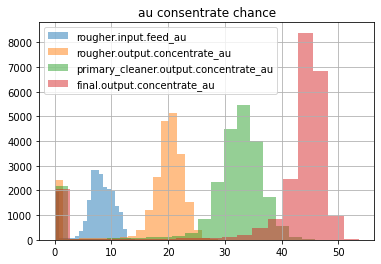

In [28]:
proses_consentrate_plot('au')

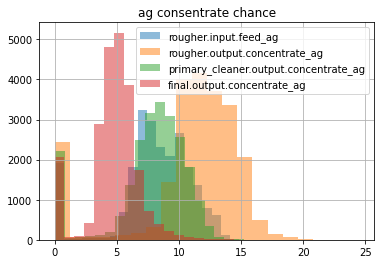

In [29]:
proses_consentrate_plot('ag')

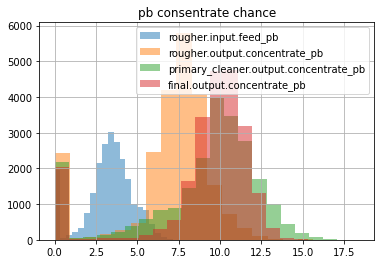

In [30]:
proses_consentrate_plot('pb')

**Catatan**

Ada beberapa catatan pada tahap ini:
1. Proses consentrate au:
    - Terdapat nilai yang cukup naik secara signifikan, dari mulai proses input, output, cleaner hingga final concentrate
    - Dari setiap tahapan tersebut terdapat outlier di sekitaran angka 0.
2. Proses consentrate ag:
    - Terdapat variasi nilai pada tahap ini. Pada tahap output dan final concentrate memiliki nilai yang cukup besar. Nilai untuk input dan cleaner memiliki nilai yang kurang lebih sama dibawah nilai output dan final concentrate.
    - Dari setiap tahapan tersebut terdapat outlier di sekitaran angka 0.
3. Proses consentrate pb:
    - Nilai dari cleaner memiliki nilai yang paling rendah diantara proses lainnya, disusul dengan input, final hingga output concentrate.

### Perbandingan Distribusi 

Bandingkan distribusi ukuran partikel feed dalam training set dan test set. Jika distribusinya bervariasi secara signifikan, evaluasi model akan salah.

Untuk membandingkan distribusi dari partikel feed pada training set dan test test, mari buat 2 grafik yang menujukan data dengan outlier dan data tandpa outlier, apakah hasilnya kurang lebih sama atau ada perbedaaan yang mencolok. Agar lebih mudah mari gunakan 2 buah fungsi, fungsi pertama untuk memisahkan data oulier dan fungsi kedua untuk memudahkan visualisasi dari distribusi persebarannya.

In [31]:
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

def compare_distributions_feed(features):
    filter_outliers(df_train[features]).plot.kde()
    filter_outliers(df_test[features]).plot.kde()
    plt.legend(['train', 'test'])

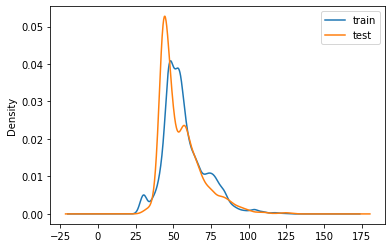

In [32]:
compare_distributions_feed('rougher.input.feed_size')

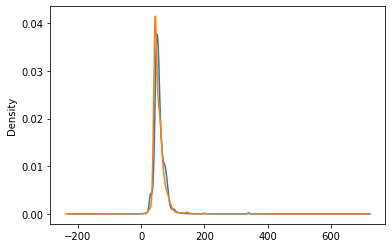

In [33]:
df_train['rougher.input.feed_size'].plot.kde()
df_test['rougher.input.feed_size'].plot.kde();

**Catatan**

Distribusi ukuran partikel feed dalam training set dan test set kurang lebih sama. Terdapat kenaikan pada kisaran 25-75. Begitu pula distribusi dalam training set dan test set tanpa outlier.

### Pertimbangan Total Konsentrasi 

Pertimbangkan total konsentrasi semua substansi di tahap yang berbeda: feed mentah, konsentrasi yang lebih kasar, dan konsentrasi akhir. Apakah kamu melihat adanya nilai abnormal dalam distribusi total? Jika ya, apakah perlu menghapus nilai-nilai tersebut dari kedua sampel? Jelaskan yang kamu temukan dan singkirkan anomalinya.

Pada tahap ini ada 3 bagian dari proses yang harus di totalkan secara keseluruhan. 3 bagian tersebut terdiri dari:
- feed mentah
- konsentrasi yang lebih kasar
- konsentrasi akhir

Untuk mencari nilai total dari ketiga bagian tersebut, mari pisahkan perhitungannya sesuan dengan bagian-bagiannya.

**Feed Mentah**

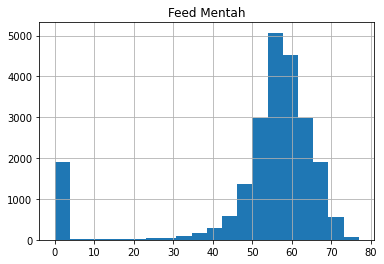

In [34]:
features_input_concentrate = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb', 
    'rougher.input.feed_sol',
    'rougher.input.feed_au'
]

df_full[features_input_concentrate].sum(1).hist(bins=20)
plt.title('Feed Mentah')
plt.show()

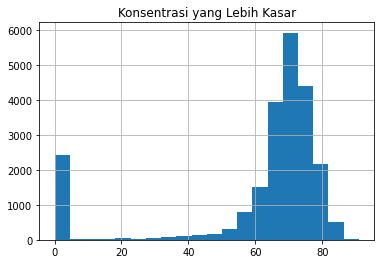

In [35]:
features_output_concentrate = [
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
    'rougher.output.concentrate_au',
]

df_full[features_output_concentrate].sum(1).hist(bins=20)
plt.title('Konsentrasi yang Lebih Kasar')
plt.show()

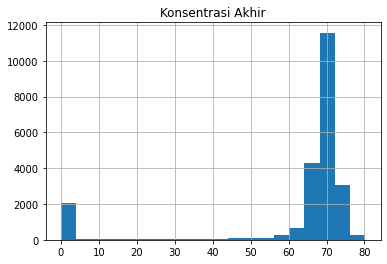

In [36]:
features_final_concentrate = [
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
    'final.output.concentrate_au',
]

df_full[features_final_concentrate].sum(1).hist(bins=20)
plt.title('Konsentrasi Akhir')
plt.show()

**Catatan**

Dari hasil perhitungan ketiga bagian yang ada, terlihat pada ketiga grafik menunjukan adanya data outlier pada nilai antara 0 hingga 1 atau bisa dibilang bahwa nilai outlier terbanyak adalah nilai 0. Untuk mengatasi nya mari buat batasan agar outlier tidak terbawa ke dalam perhitungan yang ada. Batasan yang akan dibuat adalah data yang lebih besar dari 0.1.

In [37]:
threshold = 0.1

df_train = df_train[df_train[features_input_concentrate].sum(1) > threshold]
df_train = df_train[df_train[features_output_concentrate].sum(1) > threshold]
df_train = df_train[df_train[features_final_concentrate].sum(1) > threshold]

print(df_train.shape)

(14672, 87)


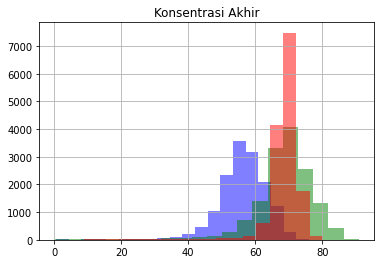

In [38]:
df_train[features_input_concentrate].sum(1).hist(alpha=0.5, bins=20, color='blue')
plt.title('Feed Mentah')

df_train[features_output_concentrate].sum(1).hist(alpha=0.5, bins=20, color='green')
plt.title('Konsentrasi yang Lebih Kasar')

df_train[features_final_concentrate].sum(1).hist(alpha=0.5, bins=20, color='red')
plt.title('Konsentrasi Akhir')
plt.show()

**Catatan**

Pada df_train tahap concentrate nilai outlier sudah di drop. Grafik yang terlihat diatas adalah grafik dari nilai pada tahap concentrate tanpa nilai outlier. Rantang pertumbuhanya berada pada rentang 40-80.

## Buat modelnya

### Nilai sMAPE akhir.

Buat sebuah fungsi yang digunakan untuk menghitung nilai sMAPE akhir.

Sebelum membuat fungsi yang akan menghituung nilai dari sMAPE akhir, mari persiapkan datanya.

In [39]:
columns_used = df_test.columns.values.tolist()
columns_used.append('rougher.output.recovery')
columns_used.append('final.output.recovery')
columns_used

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

In [40]:
df_train_fixed = df_train[columns_used]
df_train_fixed.shape, df_test.shape

((14672, 55), (5856, 53))

**df_train**

In [41]:
targets = ['rougher.output.recovery', 'final.output.recovery']
features = df_train_fixed.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery']).columns.values

In [42]:
features_train = df_train_fixed[features].reset_index(drop=True)
target_train = df_train_fixed[targets].reset_index(drop=True)

In [43]:
features_train.shape, target_train.shape

((14672, 52), (14672, 2))

In [44]:
features_train.isna().sum(), target_train.isna().sum()

(primary_cleaner.input.sulfate                 0
 primary_cleaner.input.depressant              0
 primary_cleaner.input.feed_size               0
 primary_cleaner.input.xanthate                0
 primary_cleaner.state.floatbank8_a_air        0
 primary_cleaner.state.floatbank8_a_level      0
 primary_cleaner.state.floatbank8_b_air        0
 primary_cleaner.state.floatbank8_b_level      0
 primary_cleaner.state.floatbank8_c_air        0
 primary_cleaner.state.floatbank8_c_level      0
 primary_cleaner.state.floatbank8_d_air        0
 primary_cleaner.state.floatbank8_d_level      0
 rougher.input.feed_ag                         0
 rougher.input.feed_pb                         0
 rougher.input.feed_rate                       0
 rougher.input.feed_size                       0
 rougher.input.feed_sol                        0
 rougher.input.feed_au                         0
 rougher.input.floatbank10_sulfate             0
 rougher.input.floatbank10_xanthate            0
 rougher.input.float

In [45]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [46]:
target_train.head()

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


**df_test**

In [47]:
target_test = df_full[df_full['date'].isin(df_test['date'])][targets].reset_index(drop=True)
features_test = df_test.drop(columns=['date']).reset_index(drop=True)

In [48]:
features_test.shape, target_test.shape

((5856, 52), (5856, 2))

In [49]:
features_test.isna().sum(), target_test.isna().sum()

(primary_cleaner.input.sulfate                 0
 primary_cleaner.input.depressant              0
 primary_cleaner.input.feed_size               0
 primary_cleaner.input.xanthate                0
 primary_cleaner.state.floatbank8_a_air        0
 primary_cleaner.state.floatbank8_a_level      0
 primary_cleaner.state.floatbank8_b_air        0
 primary_cleaner.state.floatbank8_b_level      0
 primary_cleaner.state.floatbank8_c_air        0
 primary_cleaner.state.floatbank8_c_level      0
 primary_cleaner.state.floatbank8_d_air        0
 primary_cleaner.state.floatbank8_d_level      0
 rougher.input.feed_ag                         0
 rougher.input.feed_pb                         0
 rougher.input.feed_rate                       0
 rougher.input.feed_size                       0
 rougher.input.feed_sol                        0
 rougher.input.feed_au                         0
 rougher.input.floatbank10_sulfate             0
 rougher.input.floatbank10_xanthate            0
 rougher.input.float

In [50]:
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [51]:
target_test.head()

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

Target dan fitur sudah berhasil dipisahkan, mari buat fungsi untuk mencari nilai dari sMAPE.

In [53]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2
    
    return (error / scale).mean() * 100

In [54]:
def smape_weighted(y_true, y_pred):
    rougher = smape(y_true.iloc[:,0], y_pred.iloc[:,0])
    final = smape(y_true.iloc[:,1], y_pred.iloc[:,1])
    
    return 0.25 * rougher + 0.75 * final

In [55]:
def score_model(model, cv=3):
    scores = []
    scores_test = []
    
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):
        
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))
        pred_test = pd.DataFrame(model.predict(features_test))
        
        scores.append(smape_weighted(target_valid, pred_valid))
        scores_test.append(smape_weighted(target_test, pred_test))
        
    return pd.Series(scores).mean(), pd.Series(scores_test).mean()

In [56]:
target_train.shape, features_train.shape

((14672, 2), (14672, 52))

In [57]:
features_test.shape, target_test.shape

((5856, 52), (5856, 2))

In [58]:
model_1 = LinearRegression()
scores = score_model(model_1)

print('LR-Cross validation')
print('sMAPE score train_set & test_set:', scores)

LR-Cross validation
sMAPE score train_set & test_set: (12.830829530320665, 11.169048310551238)


In [59]:
print('RF-Cross validation')
for depth in range(1, 5):
    model = RandomForestRegressor(max_depth=depth, n_estimators=50, random_state=1234)
    scores = score_model(model)
    print(f'depth:{depth}\nsMAPE score train_set & test_set:{scores}')
    

RF-Cross validation
depth:1
sMAPE score train_set & test_set:(10.437208248387352, 10.079180254100757)
depth:2
sMAPE score train_set & test_set:(10.599671390044591, 9.811233488300497)
depth:3
sMAPE score train_set & test_set:(10.019611141659697, 9.884379830499176)
depth:4
sMAPE score train_set & test_set:(10.062721348042102, 9.948303308361231)


In [60]:
print('RF-Cross validation')
for depth in range(1, 5):
    model = RandomForestRegressor(max_depth=depth, n_estimators=100, random_state=1234)
    scores = score_model(model)
    print(f'depth:{depth}\nsMAPE score train_set & test_set:{scores}')
    

RF-Cross validation
depth:1
sMAPE score train_set & test_set:(10.421727329856507, 10.057275182934186)
depth:2
sMAPE score train_set & test_set:(10.610752511915619, 9.772042110081918)
depth:3
sMAPE score train_set & test_set:(10.044088267911564, 9.878260606898417)
depth:4
sMAPE score train_set & test_set:(10.059725637897184, 9.939947665431278)


**Catatan**

Didapat hasil dari nilai sMAPE akhir pada trainset dan testset yang memiliki nilai paling baik adalah dengan menggunakan model RandomForestRegressor dengan max_depth 3 dan n_estimators 50. MAri lakukan test terakhir pada dataset dengan model terbaik.

### Pengujian Terakhir

In [61]:
print('RF-Cross validation')
print('max_depth: 3 & n_estimators: 50')
model = RandomForestRegressor(max_depth=3, n_estimators=50, random_state=1234)
model.fit(features_train, target_train)

pred_train = pd.DataFrame(model.predict(features_train))
print('score train:', smape_weighted(target_train, pred_train))

pred_test = pd.DataFrame(model.predict(features_test))
print('score test:', smape_weighted(target_test, pred_test))

RF-Cross validation
max_depth: 3 & n_estimators: 50
score train: 7.740512851606221
score test: 9.509923320537078


## Kesimpulan Umum

Ada beberapa kesimpulan dari pengujian yang telah dilakukan diantaranya:
1. Tahap 1
- Ukuran data : 
    - df_train (16860, 87) 
    - df_test (5856, 53) 
    - df_full (22716, 87)
- Dari ketiga dataset tidak terdapat duplikasi didalamnya.
- Terdapat missing value di 3 dataset tersebut
- Nilai MAE antara perhitungan dan nilai fitur memiliki nilai yang sangat kecil yaitu 9.303415616264301e-15. Dapat dikatakan perolehan emas pada fitur sudah benar karena nilai MAE antaran perhitungan dan nilai fitur memiliki nilai yang sangat kecil,

2. Tahap 2
- Proses consentrate au:
    - Terdapat nilai yang cukup naik secara signifikan, dari mulai proses input, output, cleaner hingga final concentrate
    - Dari setiap tahapan tersebut terdapat outlier di sekitaran angka 0.
- Proses consentrate ag:
    - Terdapat variasi nilai pada tahap ini. Pada tahap output dan final concentrate memiliki nilai yang cukup besar.
    - Nilai untuk input dan cleaner memiliki nilai yang kurang lebih sama dibawah nilai output dan final concentrate.
    - Dari setiap tahapan tersebut terdapat outlier di sekitaran angka 0.
- Proses consentrate pb:
    - Nilai dari cleaner memiliki nilai yang paling rendah diantara proses lainnya, disusul dengan input, final hingga output concentrate.

- Distribusi ukuran partikel feed dalam training set dan test set kurang lebih sama. Terdapat kenaikan pada kisaran 25-75. Begitu pula distribusi dalam training set dan test set tanpa outlier.
- Pada df_train tahap concentrate nilai outlier sudah di drop. Grafik yang terlihat diatas adalah grafik dari nilai pada tahap concentrate tanpa nilai outlier. Rantang pertumbuhanya berada pada rentang 40-80.

3. Tahap 3 
- Didapat hasil dari nilai sMAPE akhir pada trainset dan testset yang memiliki nilai paling baik adalah dengan menggunakan model RandomForestRegressor dengan max_depth 3 dan n_estimators 50. MAri lakukan test terakhir pada dataset dengan model terbaik.
- Hasil uji terakhil menggunakan model yang terbaik:
    - max_depth: 3 & n_estimators: 50
    - score train: 7.740512851606221
        - score test: 9.509923320537078